# Import libraries


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,average_precision_score,classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\aksha\Downloads\Fraud.csv')
df1=df.copy()

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

# type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

# amount - amount of the transaction in local currency.

# nameOrig - customer who started the transaction

# oldbalanceOrg - initial balance before the transaction

# newbalanceOrig - new balance after the transaction

# nameDest - customer who is the recipient of the transaction

# oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

# newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

# isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

# isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [6]:
df.shape

(6362620, 11)

In [7]:
df.size


69988820

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [12]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
df['type'].nunique()

5

In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [15]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [16]:
# As we can see there is inconsistency in the colunm names so inorder to maintain consistency we rename the column names

In [17]:
df=df.rename(columns={'nameOrig' : 'nameorg', 'oldbalanceOrg' : 'oldbalanceorg' , 'newbalanceOrig' : 'newbalanceorig', 
                    'nameDest' : 'namedest', 'oldbalanceDest' : 'oldbalancedest' , 'newbalanceDest' : 'newbalancedest',
                     'isFraud' : 'isfraud', 'isFlaggedFraud' : 'isflaggedfraud'})

df.head()

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameorg', 'oldbalanceorg', 'newbalanceorig',
       'namedest', 'oldbalancedest', 'newbalancedest', 'isfraud',
       'isflaggedfraud'],
      dtype='object')

## 1. Data cleaning including missing values, outliers and multi-collinearity

In [19]:
df.isnull().sum()

step              0
type              0
amount            0
nameorg           0
oldbalanceorg     0
newbalanceorig    0
namedest          0
oldbalancedest    0
newbalancedest    0
isfraud           0
isflaggedfraud    0
dtype: int64

In [20]:
# --> As we can see that there are no missing values in the dataset that dosen't mean that we have no null values
# because there are o values is some specified columns

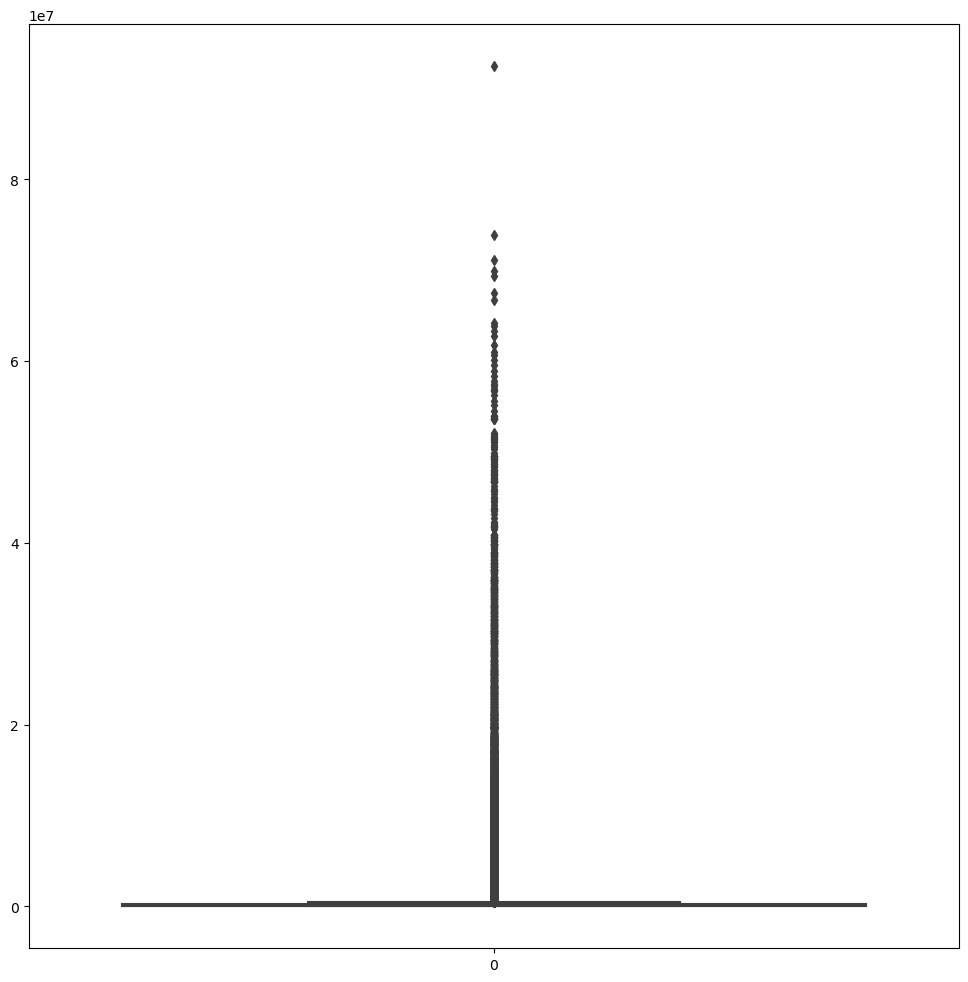

In [21]:
# outliers
plt.figure(figsize=(12,12))
sns.boxplot(df['amount'])
plt.show()

In [22]:
# As we can see there is so much variance in the df['amount'] that can't be seen in box plot

In [23]:
# outlier detection using z-score
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df['amount'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [2421578.09, 2545478.01, 2061082.82, 3776389.09, 2258388.15, 2223005.62, 2107293.71, 2317408.88, 2604219.11, 2441078.3, 2032275.62, 2474181.78, 2837270.65, 10000000.0, 10000000.0, 2930418.44, 2930418.44, 2025330.83, 2062692.94, 2576294.8, 2102252.96, 2222097.28, 2511647.23, 2241254.39, 2011670.91, 2940764.72, 2943845.35, 2861134.92, 2153550.39, 5460002.91, 5460002.91, 2316902.39, 2301415.25, 2283519.94, 2245813.81, 2271227.47, 2063647.78, 2552176.18, 2848328.52, 2234288.78, 2702697.15, 2022478.14, 2059918.28, 2206784.53, 2026545.3, 3236850.76, 2794982.53, 3457807.35, 2767908.66, 2614699.02, 2014771.88, 2107356.28, 2195051.02, 2241986.78, 2015246.93, 2304548.56, 2628265.07, 2117027.99, 2352703.57, 2416072.81, 2370301.7, 2068925.43, 2783998.4, 5677662.29, 2612615.69, 2604737.7, 3007043.04, 2325148.88, 3903432.11, 2419330.48, 2106899.77, 2158290.89, 2420979.43, 2597158.62, 2047252.95, 2029109.94, 2300391.28, 2145086.77, 2045705.04, 2029209.07, 3226604.31, 2

In [24]:
# Actually if we see clearly there is no point in talking about outliers because it is a financial data where
# amount can be any real value

In [25]:
# Firstly convert categorical variables into numerical variables

In [26]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [27]:
df['type'].replace({'TRANSFER': 1, 'CASH_OUT': 2, 'PAYMENT': 3, 'DEBIT': 4, 'CASH_IN': 5 }, inplace=True)

In [28]:
df.sample(8)

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
2570527,207,3,850.82,C1461737132,191131.41,190280.60,M2074614429,0.00,0.00,0,0
3255280,251,2,15656.99,C228637941,0.00,0.00,C253615970,415613.96,431270.95,0,0
3056125,234,2,117923.72,C282246383,330378.81,212455.09,C2142190318,1052786.48,1170710.20,0,0
5987756,409,5,228488.37,C474860138,3373074.59,3601562.96,C375172628,826841.48,598353.11,0,0
5937236,404,3,2954.45,C1181555497,8779.59,5825.14,M406645217,0.00,0.00,0,0
372473,17,2,264270.73,C1092921023,12433.00,0.00,C1879307252,9524342.97,9788613.70,0,0
2457105,203,5,155375.17,C1973814103,3479759.74,3635134.92,C723478296,237307.69,81932.52,0,0
5737696,399,3,12048.44,C387394566,0.00,0.00,M800261171,0.00,0.00,0,0


In [29]:
# Multi  collinearity

In [30]:
df.corr()

,step,type,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
step,1.000000,0.004744,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.004744,1.000000,-0.168113,0.446636,0.466639,-0.039592,-0.096923,-0.040947,-0.002441
amount,0.022373,-0.168113,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceorg,-0.010058,0.446636,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceorig,-0.010299,0.466639,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalancedest,0.027665,-0.039592,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalancedest,0.025888,-0.096923,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isfraud,0.031578,-0.040947,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isflaggedfraud,0.003277,-0.002441,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


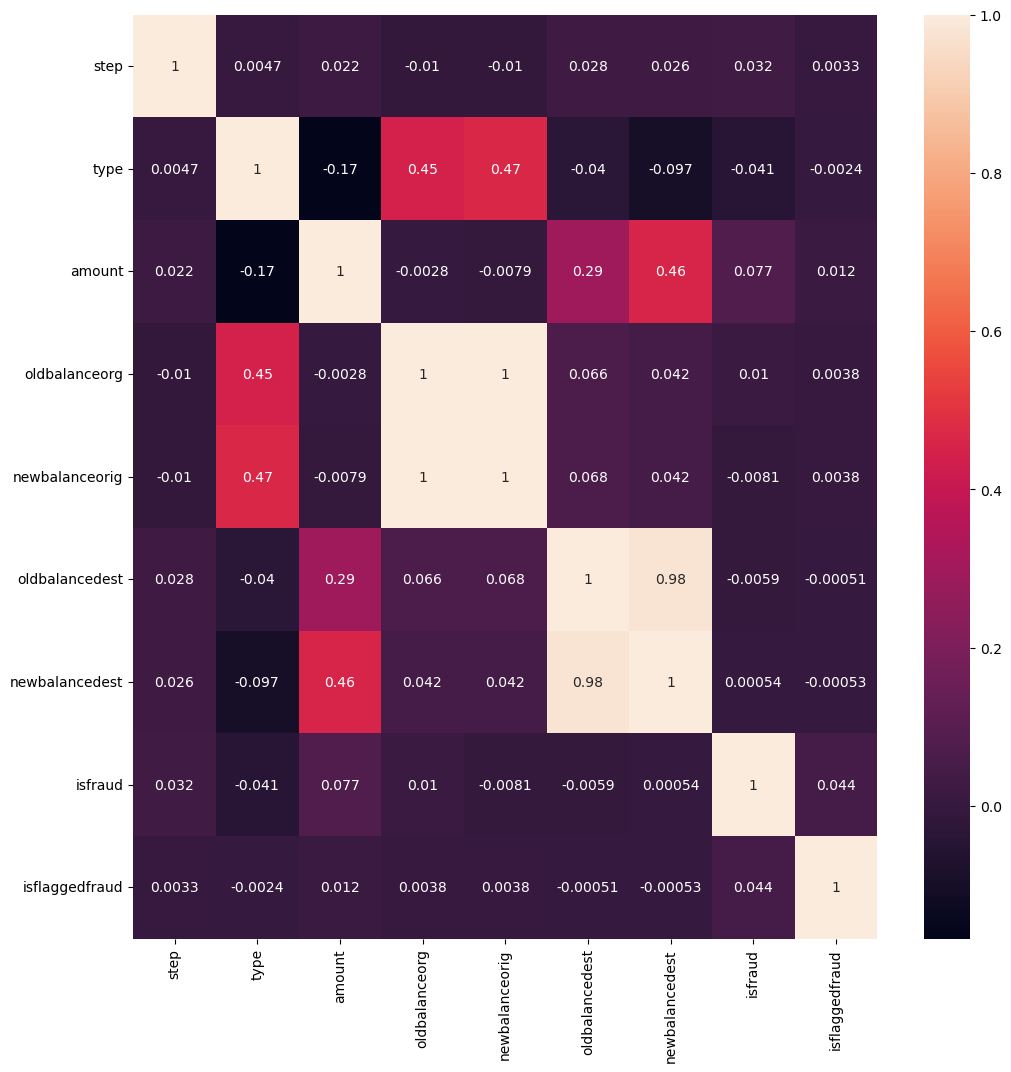

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [32]:
# It's important to note that while correlation can be useful tool for detecting multicollinearity, it dosen't 
# provide a complete picture of severity of the issue hence vif metric comes handy 

In [33]:
temp_df=df.drop(columns=['nameorg', 'namedest', 'isfraud', 'isflaggedfraud'])

In [34]:
temp_df.values

array([[1.00000000e+00, 3.00000000e+00, 9.83964000e+03, ...,
        1.60296360e+05, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 1.86428000e+03, ...,
        1.93847200e+04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.81000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.43000000e+02, 2.00000000e+00, 6.31140928e+06, ...,
        0.00000000e+00, 6.84888400e+04, 6.37989811e+06],
       [7.43000000e+02, 1.00000000e+00, 8.50002520e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.43000000e+02, 2.00000000e+00, 8.50002520e+05, ...,
        0.00000000e+00, 6.51009911e+06, 7.36010163e+06]])

In [35]:
temp_df.sample(5)

,step,type,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest
1927390,168,2,453629.34,39885.35,0.00,722242.92,1175872.26
3214000,249,3,9126.37,0.00,0.00,0.00,0.00
4888061,349,2,97138.86,16973.00,0.00,135885.27,233024.13
397565,18,3,1923.28,21277.00,19353.72,0.00,0.00
5836371,402,2,79258.60,742.00,0.00,0.00,79258.60


In [36]:
# VIF to check the multicollinearity between variables

vif_df=pd.DataFrame()
vif_df['features']=temp_df.columns
vif_df['VIF']=[variance_inflation_factor(temp_df.values,i) for i in range(len(temp_df.columns))]

print(vif_df)

         features         VIF
0            step    3.050587
1            type    3.697998
2          amount    4.054616
3   oldbalanceorg  510.422779
4  newbalanceorig  518.778882
5  oldbalancedest   72.888146
6  newbalancedest   84.459570


In [37]:
# As we can see clearly oldbalanceorg, newbalanceorg are highly correlated, understandabily because when transaction 
# happens both columns will change. Hence considering both the columns will create that kind of model which has 
# multicollinearity. so, we need to drop a column

In [38]:
# check for duplicates

df.duplicated().sum()

0

In [39]:
df[df.duplicated()]
# No duplicate rows

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud


# which type of transaction are fraud  

###  (1). By using isfraud column

In [40]:
df[df['isfraud']==1].value_counts()

step  type  amount      nameorg      oldbalanceorg  newbalanceorig  namedest     oldbalancedest  newbalancedest  isfraud  isflaggedfraud
1     1     181.00      C1305486145  181.00         0.0             C553264065   0.00            0.00            1        0                 1
484   2     67692.41    C1608782511  67692.41       0.0             C465350675   25595.60        93288.00        1        0                 1
494   1     103909.10   C1648943042  103909.10      0.0             C1134805695  0.00            0.00            1        0                 1
493   2     1214511.61  C1966863341  1214511.61     0.0             C570490831   0.00            1214511.61      1        0                 1
            605108.36   C258213312   605108.36      0.0             C1204527929  893880.11       1498988.47      1        0                 1
                                                                                                                                           ..
241   2    

In [41]:
df[df['isfraud']==1].type.values

array([1, 2, 1, ..., 2, 1, 2], dtype=int64)

In [42]:
# we can clearly see that only 2,3 i.e, ('TRANSFER': 2, 'CASH_OUT': 3) 

df_fraud_transfer1=df[(df['isfraud']==1) & (df['type']==2)]
df_fraud_cashout1=df[(df['isfraud']==1) & (df['type']==3)]

In [43]:
df_fraud_transfer0=df[(df['isfraud']==0) & (df['type']==2)]
df_fraud_cashout0=df[(df['isfraud']==0) & (df['type']==3)]

In [44]:
df_fraud_transfer1

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
3,1,2,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,2,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,2,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,2,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,2,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,2,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,2,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,2,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,2,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [45]:
df_fraud_cashout1

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud


In [46]:
df_fraud_transfer0

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
15,1,2,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
42,1,2,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0
47,1,2,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0
48,1,2,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0
51,1,2,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362306,718,2,169291.34,C1569237054,26919.00,0.0,C342077848,2684602.16,2853893.50,0,0
6362313,718,2,111963.72,C1438119383,4514.00,0.0,C99772923,154925.27,266888.99,0,0
6362317,718,2,317177.48,C857156502,170.00,0.0,C784108220,345042.13,662219.61,0,0
6362320,718,2,159188.22,C691808084,3859.00,0.0,C1818183087,0.00,159188.22,0,0


In [47]:
df_fraud_cashout0

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,3,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,3,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,3,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,3,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,3,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,3,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [48]:
df_fraud_cashout1.shape

(0, 11)

In [49]:
df_fraud_transfer1.shape


(4116, 11)

In [50]:

print('No of transfer is fraud1 :', len(df_fraud_transfer1))
print('No of cashout is fraud1 :', len(df_fraud_cashout1))


No of transfer is fraud1 : 4116
No of cashout is fraud1 : 0


In [51]:
print('No of transfer is fraud0 :', len(df_fraud_transfer0))
print('No of cashout is fraud0 :', len(df_fraud_cashout0))

No of transfer is fraud0 : 2233384
No of cashout is fraud0 : 2151495


In [52]:
print('Min amount in transfer is fraud1 :', df_fraud_transfer1['amount'].min())
print('Min amount in cashout is fraud1 :', df_fraud_cashout1['amount'].min())
print('Max amount in transfer is fraud1 :', df_fraud_transfer1['amount'].max())
print('Max amount in cashout is fraud1 :', df_fraud_cashout1['amount'].max())

Min amount in transfer is fraud1 : 0.0
Min amount in cashout is fraud1 : nan
Max amount in transfer is fraud1 : 10000000.0
Max amount in cashout is fraud1 : nan


In [53]:
print('Min amount in transfer is fraud0 :', df_fraud_transfer0['amount'].min())
print('Min amount in cashout is fraud0 :', df_fraud_cashout0['amount'].min())
print('Max amount in transfer is fraud0 :', df_fraud_transfer0['amount'].max())
print('Max amount in cashout is fraud0 :', df_fraud_cashout0['amount'].max())

Min amount in transfer is fraud0 : 0.01
Min amount in cashout is fraud0 : 0.02
Max amount in transfer is fraud0 : 2847566.62
Max amount in cashout is fraud0 : 238637.98


### (2). By usingisflaggedfraud column

In [56]:
df[df['isflaggedfraud']==1].value_counts()

step  type  amount       nameorg      oldbalanceorg  newbalanceorig  namedest     oldbalancedest  newbalancedest  isfraud  isflaggedfraud
212   1     4953893.08   C728984460   4953893.08     4953893.08      C639921569   0.0             0.0             1        1                 1
250   1     1343002.08   C1100582606  1343002.08     1343002.08      C1147517658  0.0             0.0             1        1                 1
279   1     536624.41    C1035541766  536624.41      536624.41       C1100697970  0.0             0.0             1        1                 1
387   1     4892193.09   C908544136   4892193.09     4892193.09      C891140444   0.0             0.0             1        1                 1
425   1     9585040.37   C452586515   19585040.37    19585040.37     C1109166882  0.0             0.0             1        1                 1
            10000000.00  C689608084   19585040.37    19585040.37     C1392803603  0.0             0.0             1        1                 1
554 

In [57]:
df[df['isflaggedfraud']==1].type.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [58]:
df_flaggedfraud_transfer=df[(df['isflaggedfraud']==1) & (df['type']==2)]

In [59]:
df_flaggedfraud_transfer

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud


In [60]:
print('Min amount in transfer is flaggedfraud :', df_flaggedfraud_transfer['amount'].min())
print('Min amount in transfer is flaggedfraud :', df_flaggedfraud_transfer['amount'].max())

Min amount in transfer is flaggedfraud : nan
Min amount in transfer is flaggedfraud : nan


In [61]:
df_flaggedfraud_transfer.shape

(0, 11)

In [62]:
print('No of transfer is flaggedfraud :', len(df_flaggedfraud_transfer))

No of transfer is flaggedfraud : 0


In [63]:
# isflaggedfraud value is set to 1 (isflaggedfraud=1) when transaction is above 200,000 in a single transaction  
# but from the above analysis we can say that max amount in a single transaction is 10000000 and also there are only
# 16 transactions that are said to be fraud . so, there is no use of this column. so, we can safely drop this column.

### 3. oldbalanceorg and newbalanceorig columns

In [64]:
df['oldbalanceorg']

0           170136.00
1            21249.00
2              181.00
3              181.00
4            41554.00
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: oldbalanceorg, Length: 6362620, dtype: float64

In [65]:
df['newbalanceorig']

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362615         0.00
6362616         0.00
6362617         0.00
6362618         0.00
6362619         0.00
Name: newbalanceorig, Length: 6362620, dtype: float64

In [66]:
df[(df['oldbalanceorg']==0) & (df['newbalanceorig']==0)]

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
29,1,3,9920.52,C764826684,0.0,0.0,M1940055334,0.00,0.00,0,0
30,1,3,3448.92,C2103763750,0.0,0.0,M335107734,0.00,0.00,0,0
31,1,3,4206.84,C215078753,0.0,0.0,M1757317128,0.00,0.00,0,0
32,1,3,5885.56,C840514538,0.0,0.0,M1804441305,0.00,0.00,0,0
33,1,3,5307.88,C1768242710,0.0,0.0,M1971783162,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6356052,709,2,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0
6356244,709,3,14499.40,C1009494758,0.0,0.0,M840318507,0.00,0.00,0,0
6362461,730,2,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0
6362463,730,2,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1,0


In [67]:
df[(df['oldbalanceorg']==0) & (df['newbalanceorig']==0)].shape

(2088985, 11)

In [68]:
len(df[(df['oldbalanceorg']==0) & (df['newbalanceorig']==0)])

2088985

In [69]:
# There are multiple accounts which has oldbalanceorg and newbalanceorig is equal to zero this is because
# transaction is on hold and there is no information available for merchants
print('No of accounts which has oldbalanceorg and newbalanceorig is equal to zero :', len(df[(df['oldbalanceorg']==0) & (df['newbalanceorig']==0)]))

No of accounts which has oldbalanceorg and newbalanceorig is equal to zero : 2088985


In [70]:
zero_balance=df[(df['oldbalanceorg']==0) & (df['newbalanceorig']==0) & (df['amount']!=0)]

In [71]:
zero_balance

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
29,1,3,9920.52,C764826684,0.0,0.0,M1940055334,0.00,0.00,0,0
30,1,3,3448.92,C2103763750,0.0,0.0,M335107734,0.00,0.00,0,0
31,1,3,4206.84,C215078753,0.0,0.0,M1757317128,0.00,0.00,0,0
32,1,3,5885.56,C840514538,0.0,0.0,M1804441305,0.00,0.00,0,0
33,1,3,5307.88,C1768242710,0.0,0.0,M1971783162,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6355984,709,3,3837.05,C1751522910,0.0,0.0,M903863937,0.00,0.00,0,0
6356000,709,2,104570.26,C606038734,0.0,0.0,C258512603,2890040.30,2994610.55,0,0
6356051,709,2,244966.80,C2092646234,0.0,0.0,C211766342,5254563.09,5499529.89,0,0
6356052,709,2,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0


In [72]:
len(zero_balance)

2088969

In [73]:
# There is transaction amount but oldbalanceorg and newbalanceorig is equal to zero. This makes no sense because 
# if transaction (amount) is taken place then there must be non-zero value for oldbalanceorg and newbalanceorig
# so,this is some kind of error 
print('No of accounts which has oldbalanceorg and newbalanceorig is equal to zero but transaction is taken place :', len(zero_balance))

No of accounts which has oldbalanceorg and newbalanceorig is equal to zero but transaction is taken place : 2088969


### 4. nameorg and namedest columns

In [74]:
df[df['nameorg'].str.startswith('C')]

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,1,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,2,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,1,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [75]:
df['nameorg'].unique

<bound method Series.unique of 0          C1231006815
1          C1666544295
2          C1305486145
3           C840083671
4          C2048537720
              ...     
6362615     C786484425
6362616    C1529008245
6362617    C1162922333
6362618    C1685995037
6362619    C1280323807
Name: nameorg, Length: 6362620, dtype: object>

In [76]:
df[df['nameorg'].str.startswith('C')].shape

(6362620, 11)

In [77]:
df[df['namedest'].str.contains('C')].shape

(4211125, 11)

In [78]:
df[df['namedest'].str.contains('M')].shape

(2151495, 11)

In [79]:
df[(df['namedest'].str.contains('M')) & (df['isfraud']==1)]

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud


In [80]:
df[(df['namedest'].str.contains('C')) & (df['isfraud']==1)]

,step,type,amount,nameorg,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
2,1,1,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,2,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,1,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,2,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,1,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,1,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,2,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,1,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [81]:
df[(df['namedest'].str.contains('C')) & (df['isfraud']==1)].shape

(8213, 11)

In [82]:
# Through this analyis we can say that in 'nameorg' column the accounts which have "M" has zreo fraud cases and
# all the fraud cases (isfraud==1) has happened in that accounts which have "C" in the 'nameorg' column

In [83]:
df[df['isfraud']==1].shape

(8213, 11)

In [84]:
df[df['isfraud']==0].shape

(6354407, 11)

### Feature selection

In [85]:
# Even we can use tree based feature selection techniques also to calculate feature importance


In [86]:
df['nameorg']=df['nameorg'].str.replace(r'\D', '').astype(int)

In [87]:
df['nameorg'].dtype

dtype('int32')

In [88]:
df['nameorg']

0          1231006815
1          1666544295
2          1305486145
3           840083671
4          2048537720
              ...    
6362615     786484425
6362616    1529008245
6362617    1162922333
6362618    1685995037
6362619    1280323807
Name: nameorg, Length: 6362620, dtype: int32

In [89]:
df['namedest']=df['namedest'].str.replace(r'\D', '').astype(int)
#df['namedest']=df['namedest'].str.replace(r'M', '').astype(int)

In [90]:
df['namedest'].dtype

dtype('int32')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameorg         int32  
 4   oldbalanceorg   float64
 5   newbalanceorig  float64
 6   namedest        int32  
 7   oldbalancedest  float64
 8   newbalancedest  float64
 9   isfraud         int64  
 10  isflaggedfraud  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 485.4 MB


In [92]:
x=df.drop('isfraud', axis=1)

In [93]:
y=df['isfraud']

In [94]:
select_feat=RandomForestClassifier(n_estimators=50,n_jobs=-1)
select_feat.fit(x,y)
feat_imp=pd.Series(select_feat.feature_importances_, index=x.columns)

In [95]:
feat_imp

step              0.086982
type              0.059913
amount            0.144855
nameorg           0.024782
oldbalanceorg     0.270353
newbalanceorig    0.027225
namedest          0.024439
oldbalancedest    0.060965
newbalancedest    0.300041
isflaggedfraud    0.000448
dtype: float64

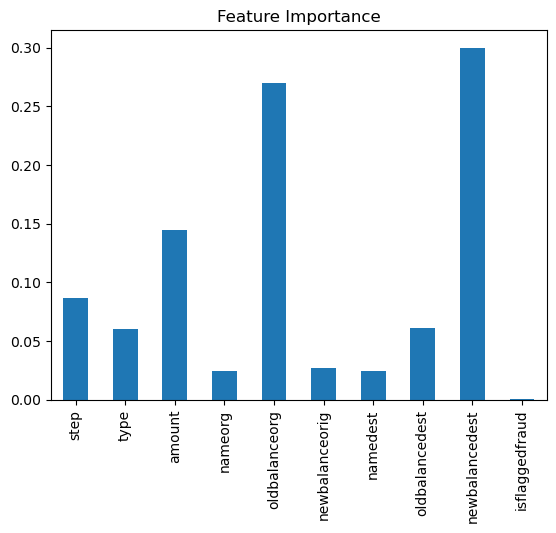

In [96]:
plt.title('Feature Importance')
feat_imp.plot(kind='bar')
plt.show()

# Data Cleaning

### 3. How did you select variables to be included in the model

In [97]:
# we can conclude from heatmap and VIF that (oldbalanceorg and newbalanceorig)  are highly correlated and
# (oldbalancedest and newbalancedest) are also highly correlated 

In [98]:
df.drop(['newbalanceorig', 'oldbalancedest'], axis=1, inplace=True)

In [99]:
#df2=df.copy()
df

,step,type,amount,nameorg,oldbalanceorg,namedest,newbalancedest,isfraud,isflaggedfraud
0,1,3,9839.64,1231006815,170136.00,1979787155,0.00,0,0
1,1,3,1864.28,1666544295,21249.00,2044282225,0.00,0,0
2,1,1,181.00,1305486145,181.00,553264065,0.00,1,0
3,1,2,181.00,840083671,181.00,38997010,0.00,1,0
4,1,3,11668.14,2048537720,41554.00,1230701703,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,786484425,339682.13,776919290,339682.13,1,0
6362616,743,1,6311409.28,1529008245,6311409.28,1881841831,0.00,1,0
6362617,743,2,6311409.28,1162922333,6311409.28,1365125890,6379898.11,1,0
6362618,743,1,850002.52,1685995037,850002.52,2080388513,0.00,1,0


In [100]:
df.shape

(6362620, 9)

In [101]:
x=df.drop('isfraud', axis=True)
y=df['isfraud'].values

In [102]:
x

,step,type,amount,nameorg,oldbalanceorg,namedest,newbalancedest,isflaggedfraud
0,1,3,9839.64,1231006815,170136.00,1979787155,0.00,0
1,1,3,1864.28,1666544295,21249.00,2044282225,0.00,0
2,1,1,181.00,1305486145,181.00,553264065,0.00,0
3,1,2,181.00,840083671,181.00,38997010,0.00,0
4,1,3,11668.14,2048537720,41554.00,1230701703,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,786484425,339682.13,776919290,339682.13,0
6362616,743,1,6311409.28,1529008245,6311409.28,1881841831,0.00,0
6362617,743,2,6311409.28,1162922333,6311409.28,1365125890,6379898.11,0
6362618,743,1,850002.52,1685995037,850002.52,2080388513,0.00,0


In [103]:
y

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [104]:
numeric_cols = ['nameorg','amount','oldbalanceorg','newbalancedest']
numeric_df = df[numeric_cols]
agg = numeric_df.groupby('nameorg').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
agg.columns = ['nameorg','count_amount','mean_amout','max_amount','min_amount','sum_amount',
               'count_oldbalaceorg','mean_oldbalanceorg','max_oldbalanceorg','min_oldbalanceorg','sum_oldbalanceorg',
               'count_newbalancedest','mean_newbalancedest','max_newbalancedest','min_newbalncedest','sum_newbalncedest']
df = df.merge(agg,how = 'left', on = 'nameorg')

In [105]:
df

,step,type,amount,nameorg,oldbalanceorg,namedest,newbalancedest,isfraud,isflaggedfraud,count_amount,...,count_oldbalaceorg,mean_oldbalanceorg,max_oldbalanceorg,min_oldbalanceorg,sum_oldbalanceorg,count_newbalancedest,mean_newbalancedest,max_newbalancedest,min_newbalncedest,sum_newbalncedest
0,1,3,9839.64,1231006815,170136.00,1979787155,0.00,0,0,1,...,1,170136.00,170136.00,170136.00,170136.00,1,0.00,0.00,0.00,0.00
1,1,3,1864.28,1666544295,21249.00,2044282225,0.00,0,0,1,...,1,21249.00,21249.00,21249.00,21249.00,1,0.00,0.00,0.00,0.00
2,1,1,181.00,1305486145,181.00,553264065,0.00,1,0,1,...,1,181.00,181.00,181.00,181.00,1,0.00,0.00,0.00,0.00
3,1,2,181.00,840083671,181.00,38997010,0.00,1,0,1,...,1,181.00,181.00,181.00,181.00,1,0.00,0.00,0.00,0.00
4,1,3,11668.14,2048537720,41554.00,1230701703,0.00,0,0,1,...,1,41554.00,41554.00,41554.00,41554.00,1,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,786484425,339682.13,776919290,339682.13,1,0,1,...,1,339682.13,339682.13,339682.13,339682.13,1,339682.13,339682.13,339682.13,339682.13
6362616,743,1,6311409.28,1529008245,6311409.28,1881841831,0.00,1,0,1,...,1,6311409.28,6311409.28,6311409.28,6311409.28,1,0.00,0.00,0.00,0.00
6362617,743,2,6311409.28,1162922333,6311409.28,1365125890,6379898.11,1,0,1,...,1,6311409.28,6311409.28,6311409.28,6311409.28,1,6379898.11,6379898.11,6379898.11,6379898.11
6362618,743,1,850002.52,1685995037,850002.52,2080388513,0.00,1,0,1,...,1,850002.52,850002.52,850002.52,850002.52,1,0.00,0.00,0.00,0.00


In [106]:
df.shape

(6362620, 24)

### split data into train data and test data

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
x_train

,step,type,amount,nameorg,oldbalanceorg,namedest,newbalancedest,isflaggedfraud
6271196,619,5,386385.08,421351828,4669568.85,1977099364,119649.98,0
1888243,164,5,212458.78,83569848,234635.00,1690589535,593579.10,0
5549957,382,3,19967.60,852995095,3634.00,1695416333,0.00,0
2025342,180,2,527616.51,61761046,180216.00,577654587,619773.61,0
682342,36,1,206067.85,758004147,0.00,2143015292,2337562.32,0
...,...,...,...,...,...,...,...,...
1570006,155,5,129715.85,170740978,5054252.83,1810492506,116977.09,0
2234489,186,3,2459.70,1844108072,0.00,1858126655,0.00,0
4926484,350,2,10579.16,1579684659,59279.00,1119180135,333333.32,0
4304572,307,2,73020.76,379222646,20289.00,1962227951,329123.61,0


In [111]:
x_train.shape

(5090096, 8)

In [112]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
y_train.shape

(5090096,)

In [114]:
x_test.shape

(1272524, 8)

In [115]:
y_test.shape

(1272524,)

In [116]:
# Machine Learning for predicting fradulent transactions

In [117]:
# checking for imbalanced data

x_fraud=x.loc[y==1]
x_notfraud=x.loc[y==0]

In [118]:
print(len(x_fraud))
print(len(x_notfraud))

8213
6354407


In [119]:
# 4. Demonstrate the performance of the model by using best set of tools

# --> selection of metric: As we can see data is highly skewed we can use area under the precision recall curve (PR-AUC)
#    rather than the conventional area under the recriver operator curve (ROC-AUC). ROC curve is not a good maetric
#    when data is imbalanced either we need to make the data balance or we need to use differnt metric for evaluation

In [120]:
# 2. Describe your fraud detection model in elaboration.

# --> selection of machine learning model : We have imbalanced dataset we need to balance it we can do it in two ways :

#    The first technique is we can make undersampling the majority class (decrease no of majority classes and make it
#     equal as the minority class). Generally this is not advisible because we are removing the original data that we have
#    The second technique is we can make oversampling the minority class (we generate synthetic data for minority class)
#    this technique is prefered (SMOTE-Synthetic Minority Oversampling Technique)

In [121]:
#Random Forest Classifier

In [122]:
rfc=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

In [123]:
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

In [124]:
y_pred_rfc=rfc.predict(x_test)

In [125]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.73      0.84      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [126]:
print("PR-AUC average precision score :", average_precision_score(y_test,y_pred_rfc))

PR-AUC average precision score : 0.7244901741085235


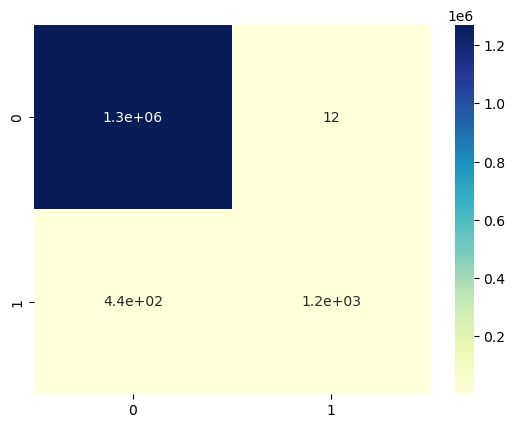

In [127]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), annot=True, cmap="YlGnBu")
plt.show()

In [128]:
# XGBClassifier

In [129]:
clf= XGBClassifier()

In [130]:
clf.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [131]:
y_pred=clf.predict(x_test)

In [132]:
print("accuracy_score is : ", accuracy_score(y_test,y_pred))
print("precision_score is :", precision_score(y_test,y_pred))
print("confusion matrix is :", confusion_matrix(y_test,y_pred))

accuracy_score is :  0.9997013808776888
precision_score is : 0.977657935285054
confusion matrix is : [[1270875      29]
 [    351    1269]]


In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.78      0.87      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



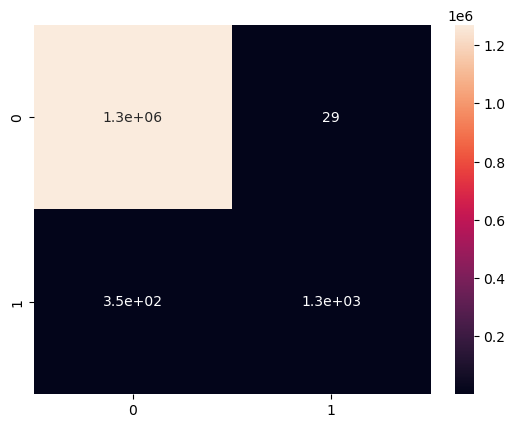

In [135]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.show()

In [136]:
# Gradient Boost Classifier

In [137]:
gbc=GradientBoostingClassifier()

In [138]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [139]:
y_pred_fbc=gbc.predict(x_test)

In [141]:
print(classification_report(y_test,y_pred_fbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.70      0.81      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [143]:
print(confusion_matrix(y_test,y_pred_fbc))

[[1270863      41]
 [    488    1132]]


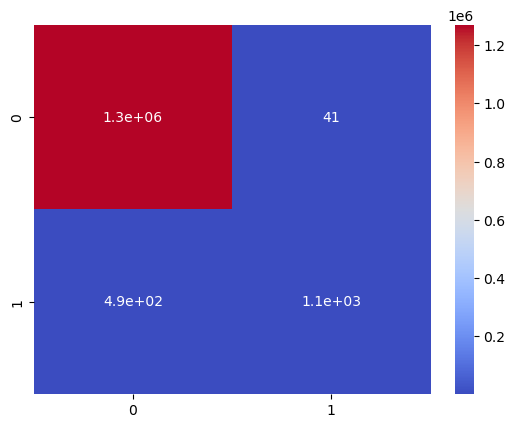

In [144]:
sns.heatmap(confusion_matrix(y_test,y_pred_fbc), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Cat Boost Classifier

In [148]:
cbc=CatBoostClassifier(iterations=1000)

In [149]:
cbc.fit(x_train,y_train)

Learning rate set to 0.39419
0:	learn: 0.0507125	total: 937ms	remaining: 15m 35s
1:	learn: 0.0168272	total: 1.5s	remaining: 12m 26s
2:	learn: 0.0041730	total: 2.1s	remaining: 11m 36s
3:	learn: 0.0033595	total: 2.62s	remaining: 10m 51s
4:	learn: 0.0028895	total: 3.23s	remaining: 10m 41s
5:	learn: 0.0027568	total: 3.77s	remaining: 10m 24s
6:	learn: 0.0025578	total: 4.33s	remaining: 10m 14s
7:	learn: 0.0023550	total: 4.88s	remaining: 10m 4s
8:	learn: 0.0022990	total: 5.4s	remaining: 9m 54s
9:	learn: 0.0022133	total: 5.92s	remaining: 9m 46s
10:	learn: 0.0021462	total: 6.49s	remaining: 9m 43s
11:	learn: 0.0021282	total: 7.07s	remaining: 9m 42s
12:	learn: 0.0021091	total: 7.7s	remaining: 9m 44s
13:	learn: 0.0020110	total: 8.3s	remaining: 9m 44s
14:	learn: 0.0019958	total: 8.87s	remaining: 9m 42s
15:	learn: 0.0019820	total: 9.47s	remaining: 9m 42s
16:	learn: 0.0019754	total: 10s	remaining: 9m 39s
17:	learn: 0.0019040	total: 10.6s	remaining: 9m 37s
18:	learn: 0.0019006	total: 11.1s	remaining: 

156:	learn: 0.0009276	total: 1m 32s	remaining: 8m 18s
157:	learn: 0.0009272	total: 1m 33s	remaining: 8m 17s
158:	learn: 0.0009269	total: 1m 33s	remaining: 8m 16s
159:	learn: 0.0009254	total: 1m 34s	remaining: 8m 16s
160:	learn: 0.0009248	total: 1m 35s	remaining: 8m 15s
161:	learn: 0.0009227	total: 1m 35s	remaining: 8m 14s
162:	learn: 0.0009208	total: 1m 36s	remaining: 8m 14s
163:	learn: 0.0009203	total: 1m 36s	remaining: 8m 13s
164:	learn: 0.0009193	total: 1m 37s	remaining: 8m 12s
165:	learn: 0.0009179	total: 1m 37s	remaining: 8m 12s
166:	learn: 0.0009165	total: 1m 38s	remaining: 8m 11s
167:	learn: 0.0009152	total: 1m 39s	remaining: 8m 11s
168:	learn: 0.0009146	total: 1m 39s	remaining: 8m 10s
169:	learn: 0.0009125	total: 1m 40s	remaining: 8m 10s
170:	learn: 0.0009121	total: 1m 40s	remaining: 8m 9s
171:	learn: 0.0009117	total: 1m 41s	remaining: 8m 8s
172:	learn: 0.0009094	total: 1m 42s	remaining: 8m 8s
173:	learn: 0.0009088	total: 1m 42s	remaining: 8m 7s
174:	learn: 0.0009059	total: 1m 

309:	learn: 0.0006922	total: 2m 56s	remaining: 6m 33s
310:	learn: 0.0006921	total: 2m 57s	remaining: 6m 33s
311:	learn: 0.0006911	total: 2m 58s	remaining: 6m 32s
312:	learn: 0.0006903	total: 2m 58s	remaining: 6m 32s
313:	learn: 0.0006898	total: 2m 59s	remaining: 6m 31s
314:	learn: 0.0006887	total: 2m 59s	remaining: 6m 30s
315:	learn: 0.0006883	total: 3m	remaining: 6m 30s
316:	learn: 0.0006876	total: 3m	remaining: 6m 29s
317:	learn: 0.0006869	total: 3m 1s	remaining: 6m 28s
318:	learn: 0.0006866	total: 3m 1s	remaining: 6m 28s
319:	learn: 0.0006858	total: 3m 2s	remaining: 6m 27s
320:	learn: 0.0006852	total: 3m 2s	remaining: 6m 26s
321:	learn: 0.0006849	total: 3m 3s	remaining: 6m 26s
322:	learn: 0.0006846	total: 3m 3s	remaining: 6m 25s
323:	learn: 0.0006841	total: 3m 4s	remaining: 6m 25s
324:	learn: 0.0006830	total: 3m 5s	remaining: 6m 24s
325:	learn: 0.0006823	total: 3m 5s	remaining: 6m 23s
326:	learn: 0.0006820	total: 3m 6s	remaining: 6m 23s
327:	learn: 0.0006809	total: 3m 6s	remaining: 

463:	learn: 0.0005702	total: 4m 20s	remaining: 5m 1s
464:	learn: 0.0005696	total: 4m 21s	remaining: 5m
465:	learn: 0.0005687	total: 4m 21s	remaining: 4m 59s
466:	learn: 0.0005682	total: 4m 22s	remaining: 4m 59s
467:	learn: 0.0005681	total: 4m 22s	remaining: 4m 58s
468:	learn: 0.0005678	total: 4m 23s	remaining: 4m 58s
469:	learn: 0.0005674	total: 4m 23s	remaining: 4m 57s
470:	learn: 0.0005670	total: 4m 24s	remaining: 4m 57s
471:	learn: 0.0005661	total: 4m 25s	remaining: 4m 56s
472:	learn: 0.0005653	total: 4m 25s	remaining: 4m 55s
473:	learn: 0.0005646	total: 4m 26s	remaining: 4m 55s
474:	learn: 0.0005639	total: 4m 26s	remaining: 4m 54s
475:	learn: 0.0005622	total: 4m 27s	remaining: 4m 54s
476:	learn: 0.0005616	total: 4m 27s	remaining: 4m 53s
477:	learn: 0.0005611	total: 4m 28s	remaining: 4m 53s
478:	learn: 0.0005611	total: 4m 29s	remaining: 4m 53s
479:	learn: 0.0005606	total: 4m 30s	remaining: 4m 52s
480:	learn: 0.0005606	total: 4m 30s	remaining: 4m 51s
481:	learn: 0.0005604	total: 4m 3

616:	learn: 0.0004809	total: 5m 42s	remaining: 3m 32s
617:	learn: 0.0004797	total: 5m 43s	remaining: 3m 32s
618:	learn: 0.0004793	total: 5m 43s	remaining: 3m 31s
619:	learn: 0.0004788	total: 5m 44s	remaining: 3m 31s
620:	learn: 0.0004785	total: 5m 44s	remaining: 3m 30s
621:	learn: 0.0004780	total: 5m 45s	remaining: 3m 29s
622:	learn: 0.0004768	total: 5m 45s	remaining: 3m 29s
623:	learn: 0.0004764	total: 5m 46s	remaining: 3m 28s
624:	learn: 0.0004760	total: 5m 46s	remaining: 3m 28s
625:	learn: 0.0004756	total: 5m 47s	remaining: 3m 27s
626:	learn: 0.0004750	total: 5m 47s	remaining: 3m 27s
627:	learn: 0.0004742	total: 5m 48s	remaining: 3m 26s
628:	learn: 0.0004710	total: 5m 48s	remaining: 3m 25s
629:	learn: 0.0004708	total: 5m 49s	remaining: 3m 25s
630:	learn: 0.0004703	total: 5m 49s	remaining: 3m 24s
631:	learn: 0.0004698	total: 5m 50s	remaining: 3m 24s
632:	learn: 0.0004688	total: 5m 51s	remaining: 3m 23s
633:	learn: 0.0004681	total: 5m 51s	remaining: 3m 22s
634:	learn: 0.0004669	total:

769:	learn: 0.0004074	total: 7m 1s	remaining: 2m 5s
770:	learn: 0.0004073	total: 7m 2s	remaining: 2m 5s
771:	learn: 0.0004067	total: 7m 2s	remaining: 2m 4s
772:	learn: 0.0004067	total: 7m 3s	remaining: 2m 4s
773:	learn: 0.0004067	total: 7m 3s	remaining: 2m 3s
774:	learn: 0.0004060	total: 7m 4s	remaining: 2m 3s
775:	learn: 0.0004054	total: 7m 4s	remaining: 2m 2s
776:	learn: 0.0004050	total: 7m 5s	remaining: 2m 2s
777:	learn: 0.0004041	total: 7m 5s	remaining: 2m 1s
778:	learn: 0.0004028	total: 7m 6s	remaining: 2m
779:	learn: 0.0004019	total: 7m 6s	remaining: 2m
780:	learn: 0.0004015	total: 7m 7s	remaining: 1m 59s
781:	learn: 0.0004009	total: 7m 7s	remaining: 1m 59s
782:	learn: 0.0004007	total: 7m 8s	remaining: 1m 58s
783:	learn: 0.0004003	total: 7m 8s	remaining: 1m 58s
784:	learn: 0.0004003	total: 7m 9s	remaining: 1m 57s
785:	learn: 0.0004001	total: 7m 9s	remaining: 1m 57s
786:	learn: 0.0004001	total: 7m 10s	remaining: 1m 56s
787:	learn: 0.0003998	total: 7m 10s	remaining: 1m 55s
788:	lea

924:	learn: 0.0003628	total: 8m 17s	remaining: 40.3s
925:	learn: 0.0003628	total: 8m 17s	remaining: 39.8s
926:	learn: 0.0003628	total: 8m 18s	remaining: 39.2s
927:	learn: 0.0003628	total: 8m 18s	remaining: 38.7s
928:	learn: 0.0003628	total: 8m 18s	remaining: 38.1s
929:	learn: 0.0003628	total: 8m 19s	remaining: 37.6s
930:	learn: 0.0003628	total: 8m 19s	remaining: 37s
931:	learn: 0.0003628	total: 8m 20s	remaining: 36.5s
932:	learn: 0.0003628	total: 8m 20s	remaining: 35.9s
933:	learn: 0.0003628	total: 8m 20s	remaining: 35.4s
934:	learn: 0.0003628	total: 8m 21s	remaining: 34.9s
935:	learn: 0.0003628	total: 8m 21s	remaining: 34.3s
936:	learn: 0.0003628	total: 8m 22s	remaining: 33.8s
937:	learn: 0.0003628	total: 8m 22s	remaining: 33.2s
938:	learn: 0.0003628	total: 8m 23s	remaining: 32.7s
939:	learn: 0.0003628	total: 8m 23s	remaining: 32.1s
940:	learn: 0.0003628	total: 8m 23s	remaining: 31.6s
941:	learn: 0.0003628	total: 8m 24s	remaining: 31.1s
942:	learn: 0.0003628	total: 8m 24s	remaining: 3

In [150]:
y_pred_cbc=cbc.predict(x_test)

In [155]:
print(confusion_matrix(y_test,y_pred_cbc))

[[1270840      64]
 [    282    1338]]


In [157]:
print(classification_report(y_test,y_pred_cbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.83      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.91      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



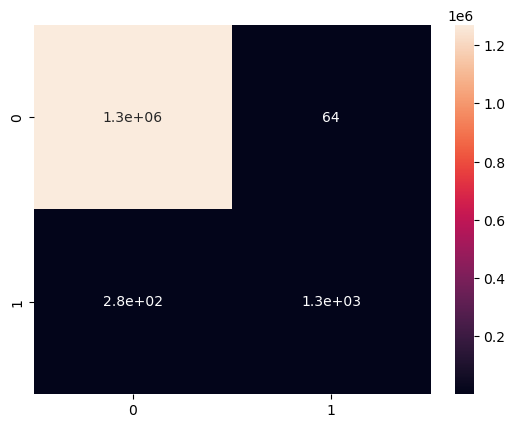

In [158]:
sns.heatmap(confusion_matrix(y_test,y_pred_cbc), annot=True)
plt.show()

In [ ]:
# So, as we can see that "CAT BOOST " is giving more results we can consider that
# (Here there is still scope for hyperparameter tuning because of my system ram constraint iam unable to do 
# that we can even more fine tune)

In [145]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Collecting catboost
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.0 MB 17.2 MB/s eta 0:00:06
   ---------------------------------------- 1.1/101.0 MB 14.0 MB/s eta 0:00:08
    --------------------------------------- 1.5/101.0 MB 12.2 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 11.1 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 11.1 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 11.1 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 11.1 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 11.1 MB/s eta 0:00:09
    --------------------------------------- 2.1/101.0 MB 11.1 MB/s 

In [ ]:
# 5. What are the key factors that predict fraudulent customer? 

#Customer’s identity (email addresses, credit card numbers, etc.) The past order details Their preferred 
# payment methods, The locations they have used for the transactions Their network (emails, phone numbers, 
# and payment details entered with the online account).

In [ ]:
# 7. What kind of prevention should be adopted while company update its infrastructure?

# Company can prevent fradulant transanctions by  focusing on payment method type ("transfer and cash_out")
# because fradulant transactions are occuring in only these cases
# we should keep an eye on huge amount transactions 

In [ ]:
# 8. Assuming these actions have been implemented, how would you determine if they work?

# Give query points (which are similar to fraud transanctions) and ask model to predict. In this manner we can see that 
# whether model is performing well or not